## Task # 08:
- This is Task 8 overall and task 2 of week 3
### Task # 02:

In [15]:
#lets import the required libraries and dataset for this task
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Display the first few rows of the dataset
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Task # 2.1:
- Calculate the mean, median, and mode of the sepal lengths in the Iris dataset

In [2]:
# Mean of sepal length
mean_sepal_length = iris_df['sepal length (cm)'].mean()

# Median of sepal length
median_sepal_length = iris_df['sepal length (cm)'].median()

# Mode of sepal length
#the mode function actually returs the series of values so thats why we use [0] index
mode_sepal_length = iris_df['sepal length (cm)'].mode()[0]

print(f"Mean of Sepal Length = {mean_sepal_length:.2f}")
print(f"Median of Sepal Length = {median_sepal_length}")
print(f"Mode of Sepal Length = {mode_sepal_length}")

Mean of Sepal Length = 5.84
Median of Sepal Length = 5.8
Mode of Sepal Length = 5.0


Task # 2.2:
-  Calculate the variance and standard deviation of the petal widths in the Iris dataset.

In [3]:
# Variance of petal width
variance_petal_width = iris_df['petal width (cm)'].var()

# Standard deviation of petal width
std_dev_petal_width = iris_df['petal width (cm)'].std()

print(f"Variance of petal width = {variance_petal_width:.2f}")
print(f"Standard Deviation of petal width = {std_dev_petal_width:.2f}")

Variance of petal width = 0.58
Standard Deviation of petal width = 0.76


Task # 2.3:
- Create a summary table that includes the mean, median, variance, and standard 
deviation for all numerical features in the dataset

In [4]:
# Empty DataFrame for the summary table
summary_table = pd.DataFrame(index=['mean', 'mode', 'std', 'variance'], columns=iris_df.columns)

# Iterating over each column in the dataset
for column in iris_df.columns:
    mean_value = iris_df[column].mean()
    mode_value = iris_df[column].mode()[0]  # Access the first mode value
    std_value = iris_df[column].std()
    variance_value = iris_df[column].var()
    
    # Appending the calculated statistics to the summary table
    summary_table.loc['mean', column] = mean_value
    summary_table.loc['mode', column] = mode_value
    summary_table.loc['std', column] = std_value
    summary_table.loc['variance', column] = variance_value

summary_table.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
mean,5.843333,3.057333,3.758,1.199333,1.0
mode,5.0,3.0,1.4,0.2,0
std,0.828066,0.435866,1.765298,0.762238,0.819232
variance,0.685694,0.189979,3.116278,0.581006,0.671141


Task # 2.4:
-  Define a random variable for the sepal length and calculate the probability 
distribution of sepal lengths.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
#counts contains the number of data points in each bin.
#bin_edges contains the boundaries of the bins
#Use density=False when you are interested in visualizing the absolute frequency or count of data points within each bin. else it will normalize
counts, bin_edges = np.histogram(iris_df['sepal length (cm)'], bins=10, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

print(f"To verify that we have taken all the values into account")
print(sum(counts) == iris_df.shape[0])  # if True, all the values are taken into account

print(f"Frequency = {counts}")
print(f"Bin Centers = {bin_centers}")

# Calculating the probability distribution
probabilities = counts / iris_df.shape[0]

# dataframe with the bin centers, frequency, and probability
result_df = pd.DataFrame({'Bin Centers': bin_centers, 'Frequency': counts, 'Probability': probabilities})
result_df.head(10)

To verify that we have taken all the values into account
True
Frequency = [ 9 23 14 27 16 26 18  6  5  6]
Bin Centers = [4.48 4.84 5.2  5.56 5.92 6.28 6.64 7.   7.36 7.72]


,Bin Centers,Frequency,Probability
0,4.48,9,0.060000
1,4.84,23,0.153333
2,5.20,14,0.093333
3,5.56,27,0.180000
4,5.92,16,0.106667
5,6.28,26,0.173333
6,6.64,18,0.120000
7,7.00,6,0.040000
8,7.36,5,0.033333
9,7.72,6,0.040000


Task # 2.5:
- Plot the probability distribution of sepal lengths using a histogram

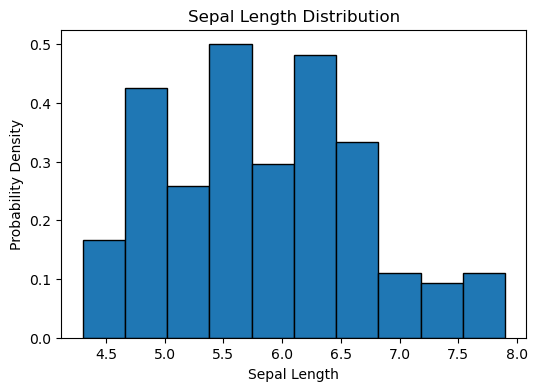

In [6]:
plt.figure(figsize=(6,4))
plt.hist(iris_df['sepal length (cm)'], bins=10,edgecolor = 'Black', density=True)
plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')
plt.title('Sepal Length Distribution')
plt.show()

Task # 2.6:
-  Calculate the cumulative distribution function (CDF) for the petal lengths and plot it.

In [7]:
counts, bin_edges = np.histogram(iris_df['petal length (cm)'], bins=10, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Calculating the probability distribution
probabilities = counts / iris_df.shape[0]

# Calculating the Cumulative Distribution Function (CDF)
cdf = np.cumsum(probabilities)

# dataframe with the bin centers, probability, and CDF
result_df = pd.DataFrame({'Bin Centers': bin_centers, 'Probability': probabilities, 'CDF': cdf})
result_df.head(10)

,Bin Centers,Probability,CDF
0,1.295,0.246667,0.246667
1,1.885,0.086667,0.333333
2,2.475,0.000000,0.333333
3,3.065,0.020000,0.353333
4,3.655,0.053333,0.406667
5,4.245,0.173333,0.580000
6,4.835,0.193333,0.773333
7,5.425,0.120000,0.893333
8,6.015,0.073333,0.966667
9,6.605,0.033333,1.000000


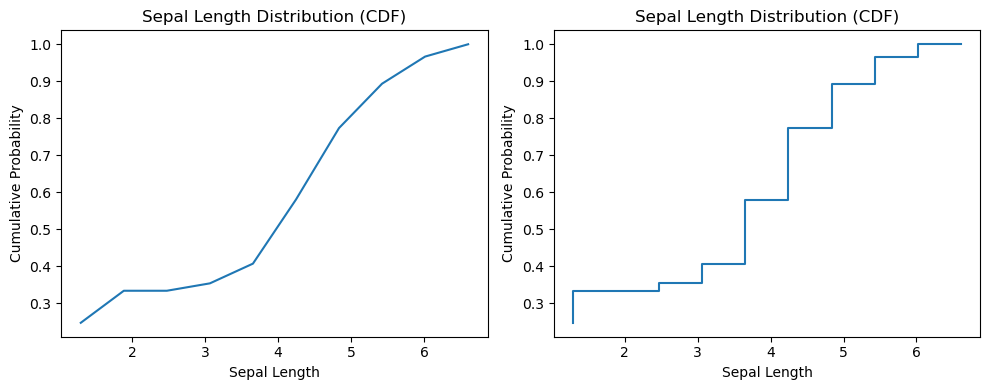

In [51]:
fig,(plot_1,stp) = plt.subplots(1,2,figsize=(10,4))

plot_1.plot(result_df['Bin Centers'], result_df['CDF'])
plot_1.set_xlabel('Sepal Length')
plot_1.set_ylabel('Cumulative Probability')
plot_1.set_title('Sepal Length Distribution (CDF)')

stp.step(result_df['Bin Centers'], result_df['CDF'])
stp.set_xlabel('Sepal Length')
stp.set_ylabel('Cumulative Probability')
stp.set_title('Sepal Length Distribution (CDF)')

plt.tight_layout()
plt.show()

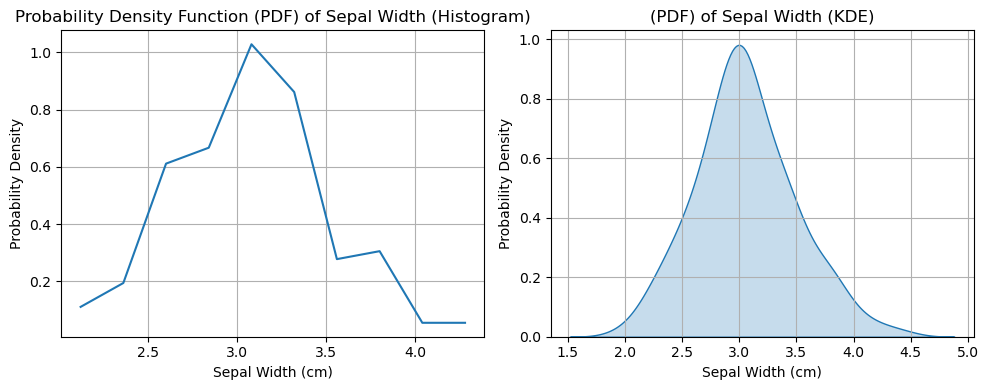

In [20]:
# Calculating PDF using histogram
counts, bin_edges = np.histogram(iris_df['sepal width (cm)'], bins=10, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = counts / (sum(counts) * bin_widths)  # Normalize to get probabilities

# Plotting the PDF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(bin_centers, pdf)
axs[0].set_xlabel('Sepal Width (cm)')
axs[0].set_ylabel('Probability Density')
axs[0].set_title('Probability Density Function (PDF) of Sepal Width (Histogram)')
axs[0].grid(True)

# Calculating PDF using seaborn's kdeplot
sns.kdeplot(iris_df['sepal width (cm)'], fill=True, ax=axs[1])
axs[1].set_xlabel('Sepal Width (cm)')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('(PDF) of Sepal Width (KDE)')
axs[1].grid(True)

plt.tight_layout()
plt.show()